In [1]:
import random
import numpy as np
import pathlib
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
path = str(Path(pathlib.Path().absolute()).parents[0])
path+="/tuzbibergurultusuhist"

In [3]:
def add_noise(image):

    row, col = image.shape #image'in shape'ini aldik

    # 300 ile 1000 arasinda random bir sayi secilecek bunlar pikselleri beyaza boyamak icin kullanilacak
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        # y koordinat icin sayi
        y_coord = random.randint(0, row - 1)

        # x koordinat icin random sayi
        x_coord = random.randint(0, col - 1)

        # pikseli beyeza boyama kismi
        image[y_coord][x_coord] = 255

  # 300 ile 1000 arasinda random bir sayi secilecek bunlar pikselleri siyaha boyamak icin kullanilacak
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        # y koordinat icin sayi
        y_coord = random.randint(0, row - 1)

        # x koordinat icin random sayi
        x_coord = random.randint(0, col - 1)

        # pikseli siyaha boyama kismi
        image[y_coord][x_coord] = 0

    return image

In [4]:
image = cv2.imread(path+'/foto.png',cv2.IMREAD_GRAYSCALE) #0
cv2.imshow('Orijinal',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
#siyah beyaz oldu fotogray cunku gray scale

-1

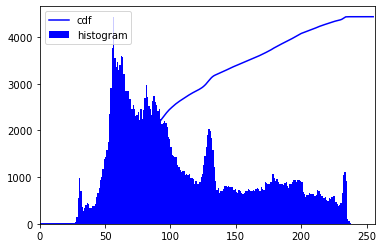

In [5]:
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [6]:
salt_and_pepper_image=add_noise(image)
cv2.imshow('Salt and Pepper',salt_and_pepper_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
#salt paper gurultusu eklendi

-1

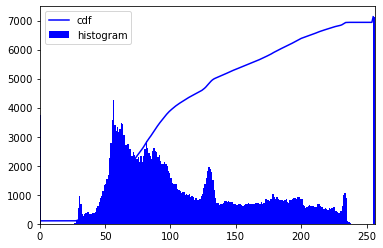

In [7]:
hist,bins = np.histogram(salt_and_pepper_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(salt_and_pepper_image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()